In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset from the CSV file
df = pd.read_csv('/content/totalTWEERTdataset.csv')

# Split the dataset into positive and negative examples
positive_examples = df[df['account.type'] == 1]
negative_examples = df[df['account.type'] == 0]

# Split the positive examples into training and validation sets
pos_train, pos_val = train_test_split(positive_examples, test_size=0.2, random_state=42)

# Split the negative examples into training and validation sets
neg_train, neg_val = train_test_split(negative_examples, test_size=0.2, random_state=42)

# Combine the training and validation sets for positive and negative examples
train_df = pd.concat([pos_train, neg_train])
val_df = pd.concat([pos_val, neg_val])

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

# Convert the text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])

# Pad the sequences to a fixed length
train_data = pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')
val_data = pad_sequences(val_sequences, maxlen=100, padding='post', truncating='post')

# Define the labels
train_labels = train_df['account.type'].values
val_labels = val_df['account.type'].values

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the validation set
val_predictions = model.predict(val_data)
val_predictions = [int(round(x[0])) for x in val_predictions]

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=val_labels, predictions=val_predictions)


Epoch 1/10
537/537 [==============================] - 81s 141ms/step - loss: 0.4591 - accuracy: 0.7678 - val_loss: 0.4299 - val_accuracy: 0.7834
Epoch 2/10
537/537 [==============================] - 75s 140ms/step - loss: 0.3193 - accuracy: 0.8599 - val_loss: 0.4112 - val_accuracy: 0.8076
Epoch 3/10
537/537 [==============================] - 76s 141ms/step - loss: 0.2490 - accuracy: 0.8938 - val_loss: 0.4859 - val_accuracy: 0.7953
Epoch 4/10
537/537 [==============================] - 73s 136ms/step - loss: 0.1912 - accuracy: 0.9241 - val_loss: 0.5205 - val_accuracy: 0.7993
Epoch 5/10
537/537 [==============================] - 72s 134ms/step - loss: 0.1381 - accuracy: 0.9447 - val_loss: 0.6057 - val_accuracy: 0.7876
Epoch 6/10
537/537 [==============================] - 74s 137ms/step - loss: 0.0972 - accuracy: 0.9637 - val_loss: 0.8120 - val_accuracy: 0.7871
Epoch 7/10
537/537 [==============================] - 73s 136ms/step - loss: 0.0616 - accuracy: 0.9782 - val_loss: 0.8318 - val_ac

NameError: ignored

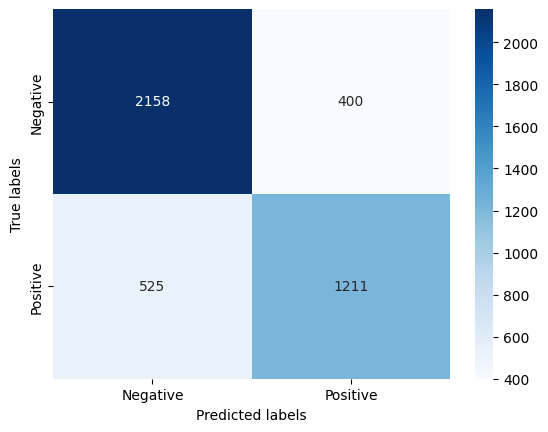

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()